In [18]:
# Install Prophet
!pip install prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [2]:
# Read the lyft_Dec_21.parquet, lyft_Dec_22.parquet, and lyft_Dec_23.parquet files into DataFrames.
lyft_21_df = pd.read_parquet("lyft_Dec_21.parquet")
lyft_22_df = pd.read_parquet("lyft_Dec_22.parquet")
lyft_23_df = pd.read_parquet("lyft_Dec_23.parquet")

# Set the `pickup_datetime` as the index to the DataFrame.
lyft_21_df.set_index("pickup_datetime", inplace=True, drop=False)  
lyft_22_df.set_index("pickup_datetime", inplace=True, drop=False)
lyft_23_df.set_index("pickup_datetime", inplace=True, drop=False)

# Display the first 5 rows of the DataFrames.
display(lyft_21_df.head())
display(lyft_22_df.head())
display(lyft_23_df.head())

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2021-12-01 00:00:00,2021-12-01 00:00:00,2021-12-01 00:46:34,138,265,14.172,2794,42.72,20.66,1.98,0.00,0.00,0.0,0.0,40.51,65.36
2021-12-01 00:00:01,2021-12-01 00:00:01,2021-12-01 00:07:41,211,4,1.655,460,14.43,0.00,0.43,1.28,2.75,0.0,0.0,5.69,18.89
2021-12-01 00:00:02,2021-12-01 00:00:02,2021-12-01 00:09:17,163,239,2.195,576,11.61,0.00,0.35,1.03,2.75,0.0,0.0,7.26,15.74
2021-12-01 00:00:02,2021-12-01 00:00:02,2021-12-01 00:07:35,174,254,1.356,453,7.15,0.00,0.21,0.63,0.00,0.0,0.0,5.47,7.99
2021-12-01 00:00:03,2021-12-01 00:00:03,2021-12-01 00:08:33,61,62,1.430,510,7.22,0.00,0.22,0.64,0.00,0.0,0.0,5.86,8.08


,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:28:16,132,25,19.092,1695,55.69,0.0,1.75,5.16,0.00,2.5,11.72,37.24,76.82
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:16:10,230,263,2.814,969,18.14,0.0,0.54,1.61,2.75,0.0,0.00,11.87,23.04
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:14:53,41,41,1.426,892,11.15,0.0,0.16,0.47,0.00,0.0,0.00,9.58,11.78
2022-12-01 00:00:03,2022-12-01 00:00:03,2022-12-01 00:15:53,181,80,6.524,950,20.48,0.0,0.61,1.82,0.00,0.0,0.00,16.01,22.91
2022-12-01 00:00:03,2022-12-01 00:00:03,2022-12-01 00:14:28,213,3,5.343,865,15.11,0.0,0.45,1.34,0.00,0.0,0.00,13.89,16.90


,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [3]:
# Group the DataFrames by date and calculate the average passenger cost for each day.
lyft_21_Cost_df = lyft_21_df.groupby(lyft_21_df.index.date)["Total_Passenger_Cost"].mean()
lyft_22_Cost_df = lyft_22_df.groupby(lyft_22_df.index.date)["Total_Passenger_Cost"].mean()
lyft_23_Cost_df = lyft_23_df.groupby(lyft_23_df.index.date)["Total_Passenger_Cost"].mean()

# Display the first 5 rows of the DataFrames.
display(lyft_21_Cost_df.head())
display(lyft_22_Cost_df.head())
display(lyft_23_Cost_df.head())

2021-12-01    27.480362
2021-12-02    28.453788
2021-12-03    27.525190
2021-12-04    29.657877
2021-12-05    40.406386
Name: Total_Passenger_Cost, dtype: float64

2022-12-01    27.211143
2022-12-02    26.155196
2022-12-03    25.784353
2022-12-04    29.058933
2022-12-05    26.826513
Name: Total_Passenger_Cost, dtype: float64

2023-12-01    29.156495
2023-12-02    29.034832
2023-12-03    31.263829
2023-12-04    29.695967
2023-12-05    30.016293
Name: Total_Passenger_Cost, dtype: float64

In [4]:
# Concatenate the lyft_21_Cost_df, lyft_22_Cost_df, and lyft_23_Cost_df DataFrames.
lyft_cost_df = pd.concat([lyft_21_Cost_df, lyft_22_Cost_df, lyft_23_Cost_df])
lyft_cost_df.head()

2021-12-01    27.480362
2021-12-02    28.453788
2021-12-03    27.525190
2021-12-04    29.657877
2021-12-05    40.406386
Name: Total_Passenger_Cost, dtype: float64

In [5]:
# Reset the index and rename the columns 
prophet_cost_df = lyft_cost_df.reset_index()
prophet_cost_df.columns = ["ds", "y"]
prophet_cost_df.head()

,ds,y
0,2021-12-01,27.480362
1,2021-12-02,28.453788
2,2021-12-03,27.525190
3,2021-12-04,29.657877
4,2021-12-05,40.406386


In [6]:
# Confirm that there are no NaN values
display(prophet_cost_df.tail())
prophet_cost_df = prophet_cost_df.dropna()
prophet_cost_df.tail()

,ds,y
88,2023-12-27,28.988537
89,2023-12-28,29.236124
90,2023-12-29,29.407026
91,2023-12-30,28.885123
92,2023-12-31,28.507264


,ds,y
88,2023-12-27,28.988537
89,2023-12-28,29.236124
90,2023-12-29,29.407026
91,2023-12-30,28.885123
92,2023-12-31,28.507264


In [7]:
# Call the Prophet function and store as an object
m_cost = Prophet()

# Fit the time series Prophet model
m_cost.fit(prophet_cost_df)

16:46:25 - cmdstanpy - INFO - Chain [1] start processing
16:46:25 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future_cost = m_cost.make_future_dataframe(periods=366, freq='D')

future_cost = future_cost.drop(future_cost.index[-366:-31])
future_cost.reset_index(drop=True, inplace=True)

# Review the first 10 and last 40 rows of the DataFrame
display(future_cost.head(10))
display(future_cost.tail(40))

,ds
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-04
4,2021-12-05
5,2021-12-06
6,2021-12-07
7,2021-12-08
8,2021-12-09
9,2021-12-10


,ds
84,2023-12-23
85,2023-12-24
86,2023-12-25
87,2023-12-26
88,2023-12-27
89,2023-12-28
90,2023-12-29
91,2023-12-30
92,2023-12-31
93,2024-12-01


In [9]:
# Make a forecast based on the future DataFrame
forecast_cost = m_cost.predict(future_cost)

# Review the first five rows of the forecast DataFrame
display(forecast_cost.head())
display(forecast_cost.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,-26.102404,24.952063,29.039439,-26.102404,-26.102404,53.092249,53.092249,53.092249,-0.088887,-0.088887,-0.088887,53.181136,53.181136,53.181136,0.0,0.0,0.0,26.989845
1,2021-12-02,-26.103888,27.008982,31.014220,-26.103888,-26.103888,55.061280,55.061280,55.061280,0.575374,0.575374,0.575374,54.485906,54.485906,54.485906,0.0,0.0,0.0,28.957392
2,2021-12-03,-26.105372,27.111819,30.885663,-26.105372,-26.105372,55.086084,55.086084,55.086084,-0.110029,-0.110029,-0.110029,55.196113,55.196113,55.196113,0.0,0.0,0.0,28.980712
3,2021-12-04,-26.106857,26.932253,31.201344,-26.106857,-26.106857,55.218242,55.218242,55.218242,-0.270324,-0.270324,-0.270324,55.488566,55.488566,55.488566,0.0,0.0,0.0,29.111386
4,2021-12-05,-26.108341,28.872912,32.973398,-26.108341,-26.108341,57.013117,57.013117,57.013117,1.498005,1.498005,1.498005,55.515112,55.515112,55.515112,0.0,0.0,0.0,30.904776


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
119,2024-12-27,-22.020379,27.929037,31.987148,-22.025314,-22.015337,52.034966,52.034966,52.034966,-0.110029,-0.110029,-0.110029,52.144996,52.144996,52.144996,0.0,0.0,0.0,30.014588
120,2024-12-28,-22.014254,27.948774,31.598851,-22.019613,-22.008666,51.804080,51.804080,51.804080,-0.270324,-0.270324,-0.270324,52.074404,52.074404,52.074404,0.0,0.0,0.0,29.789826
121,2024-12-29,-22.008129,29.544303,33.665441,-22.014119,-22.002111,53.611724,53.611724,53.611724,1.498005,1.498005,1.498005,52.113719,52.113719,52.113719,0.0,0.0,0.0,31.603595
122,2024-12-30,-22.002004,27.136421,31.109656,-22.008408,-21.995708,51.110916,51.110916,51.110916,-1.106361,-1.106361,-1.106361,52.217276,52.217276,52.217276,0.0,0.0,0.0,29.108911
123,2024-12-31,-21.995880,27.856138,31.808612,-22.002728,-21.988852,51.810262,51.810262,51.810262,-0.497777,-0.497777,-0.497777,52.308039,52.308039,52.308039,0.0,0.0,0.0,29.814383


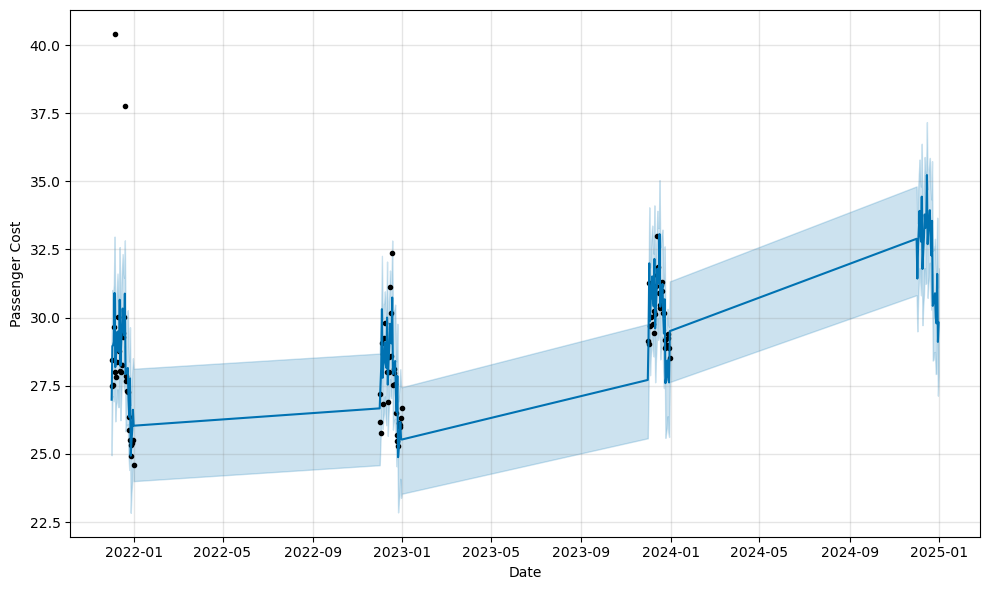

In [11]:
m_cost.plot(forecast_cost, xlabel="Date", ylabel="Passenger Cost");

## Break Down the Forecast

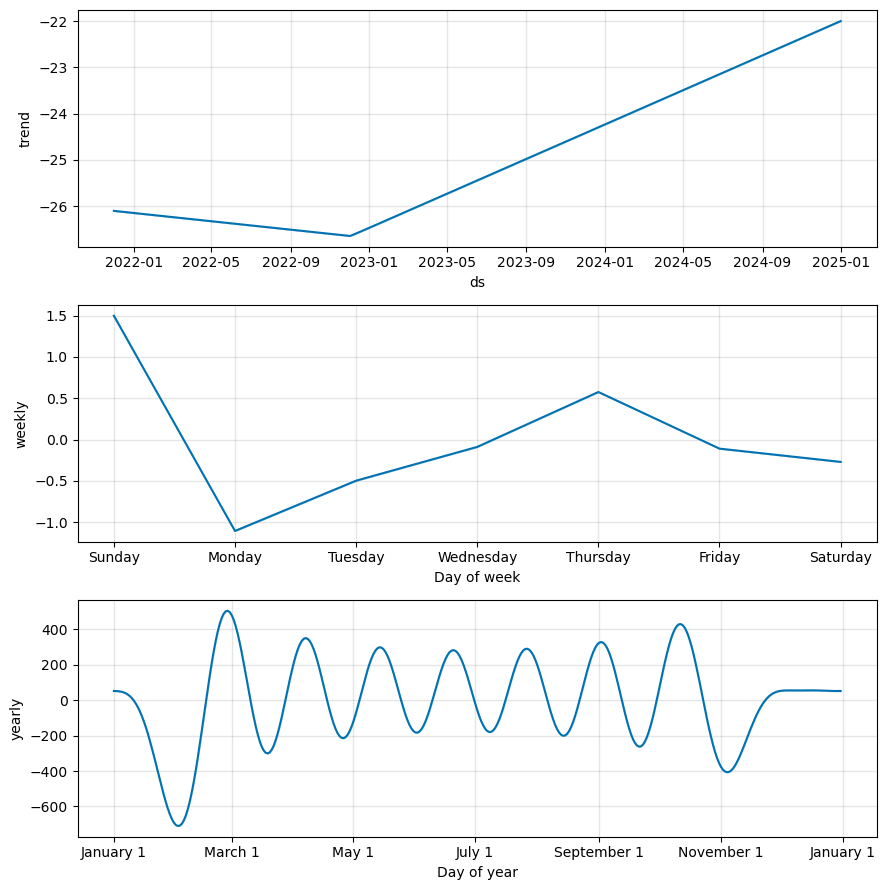

In [12]:
# Plot the individual time series components of the model
fig2 = m_cost.plot_components(forecast_cost);

- Doesn't make sense

## Plot the Upper and Lower Bounds of the Forecast

In [13]:
# Reset the index to this datetime column so that our plot looks nice
forecast_cost = forecast_cost.set_index('ds')
forecast_cost.tail(10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-12-22,-22.051003,31.612809,35.739618,-22.054176,-22.047584,55.601150,55.601150,55.601150,1.498005,1.498005,1.498005,54.103145,54.103145,54.103145,0.0,0.0,0.0,33.550147
2024-12-23,-22.044878,28.423960,32.447774,-22.048403,-22.041207,52.476524,52.476524,52.476524,-1.106361,-1.106361,-1.106361,53.582884,53.582884,53.582884,0.0,0.0,0.0,30.431646
2024-12-24,-22.038753,28.456977,32.606525,-22.042689,-22.034754,52.592708,52.592708,52.592708,-0.497777,-0.497777,-0.497777,53.090485,53.090485,53.090485,0.0,0.0,0.0,30.553954
2024-12-25,-22.032628,28.727980,32.478941,-22.036792,-22.028095,52.577293,52.577293,52.577293,-0.088887,-0.088887,-0.088887,52.666180,52.666180,52.666180,0.0,0.0,0.0,30.544664
2024-12-26,-22.026504,28.736704,32.891340,-22.031025,-22.021763,52.919107,52.919107,52.919107,0.575374,0.575374,0.575374,52.343734,52.343734,52.343734,0.0,0.0,0.0,30.892604
2024-12-27,-22.020379,27.929037,31.987148,-22.025314,-22.015337,52.034966,52.034966,52.034966,-0.110029,-0.110029,-0.110029,52.144996,52.144996,52.144996,0.0,0.0,0.0,30.014588
2024-12-28,-22.014254,27.948774,31.598851,-22.019613,-22.008666,51.804080,51.804080,51.804080,-0.270324,-0.270324,-0.270324,52.074404,52.074404,52.074404,0.0,0.0,0.0,29.789826
2024-12-29,-22.008129,29.544303,33.665441,-22.014119,-22.002111,53.611724,53.611724,53.611724,1.498005,1.498005,1.498005,52.113719,52.113719,52.113719,0.0,0.0,0.0,31.603595
2024-12-30,-22.002004,27.136421,31.109656,-22.008408,-21.995708,51.110916,51.110916,51.110916,-1.106361,-1.106361,-1.106361,52.217276,52.217276,52.217276,0.0,0.0,0.0,29.108911


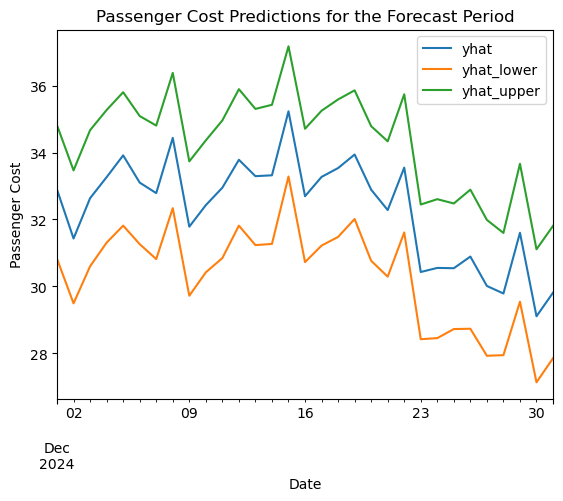

In [14]:
# Plot predictions for our forecast period
forecast_cost[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-31:,:].plot(title="Passenger Cost Predictions for the Forecast Period", xlabel="Date", ylabel="Passenger Cost");

In [15]:
# Group the DataFrames by date and calculate the number of trips for each day.
lyft_21_Count_df = lyft_21_df.groupby([lyft_21_df.index.date])["PULocationID"].count()
lyft_22_Count_df = lyft_22_df.groupby([lyft_22_df.index.date])["PULocationID"].count()
lyft_23_Count_df = lyft_23_df.groupby([lyft_23_df.index.date])["PULocationID"].count()

# Display the first 5 rows of the DataFrames.
display(lyft_21_Count_df.head())
display(lyft_22_Count_df.head())
display(lyft_23_Count_df.head())


2021-12-01    136890
2021-12-02    141684
2021-12-03    167948
2021-12-04    184653
2021-12-05    152947
Name: PULocationID, dtype: int64

2022-12-01    187099
2022-12-02    206720
2022-12-03    230342
2022-12-04    188604
2022-12-05    161900
Name: PULocationID, dtype: int64

2023-12-01    229301
2023-12-02    227712
2023-12-03    219973
2023-12-04    172382
2023-12-05    177039
Name: PULocationID, dtype: int64

In [16]:
# Concatenate the lyft_21_Count_df, lyft_22_Count_df, and lyft_23_Count_df DataFrames.
lyft_count_df = pd.concat([lyft_21_Count_df, lyft_22_Count_df, lyft_23_Count_df])
lyft_count_df.head()

2021-12-01    136890
2021-12-02    141684
2021-12-03    167948
2021-12-04    184653
2021-12-05    152947
Name: PULocationID, dtype: int64

In [17]:
# Reset the index and rename the columns 
prophet_count_df = lyft_count_df.reset_index()
prophet_count_df.columns = ["ds", "y"]
prophet_count_df.head()

,ds,y
0,2021-12-01,136890
1,2021-12-02,141684
2,2021-12-03,167948
3,2021-12-04,184653
4,2021-12-05,152947


In [18]:
# Confirm that there are no NaN values
display(prophet_count_df.tail())
prophet_count_df = prophet_count_df.dropna()
prophet_count_df.tail()

,ds,y
88,2023-12-27,168767
89,2023-12-28,183504
90,2023-12-29,199835
91,2023-12-30,201478
92,2023-12-31,224996


,ds,y
88,2023-12-27,168767
89,2023-12-28,183504
90,2023-12-29,199835
91,2023-12-30,201478
92,2023-12-31,224996


In [19]:
# Call the Prophet function and store as an object
m_count = Prophet()

# Fit the time series Prophet model
m_count.fit(prophet_count_df)

16:49:24 - cmdstanpy - INFO - Chain [1] start processing
16:49:24 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future_count = m_cost.make_future_dataframe(periods=366, freq='D')

future_count = future_count.drop(future_count.index[-366:-31])
future_count.reset_index(drop=True, inplace=True)

# Review the first 10 and last 40 rows of the DataFrame
display(future_count.head(10))
display(future_count.tail(40))

,ds
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-04
4,2021-12-05
5,2021-12-06
6,2021-12-07
7,2021-12-08
8,2021-12-09
9,2021-12-10


,ds
84,2023-12-23
85,2023-12-24
86,2023-12-25
87,2023-12-26
88,2023-12-27
89,2023-12-28
90,2023-12-29
91,2023-12-30
92,2023-12-31
93,2024-12-01


In [21]:
# Make a forecast based on the future DataFrame
forecast_count = m_count.predict(future_count)

# Review the first five rows of the forecast DataFrame
display(forecast_count.head())
display(forecast_count.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,-5313.562792,123685.513205,149630.063219,-5313.562792,-5313.562792,142624.312743,142624.312743,142624.312743,-8096.800175,-8096.800175,-8096.800175,150721.112918,150721.112918,150721.112918,0.0,0.0,0.0,137310.749950
1,2021-12-02,-5197.068471,136901.222926,160638.705833,-5197.068471,-5197.068471,153825.533438,153825.533438,153825.533438,2392.032940,2392.032940,2392.032940,151433.500498,151433.500498,151433.500498,0.0,0.0,0.0,148628.464967
2,2021-12-03,-5080.574149,150639.699562,176851.629114,-5080.574149,-5080.574149,167958.779269,167958.779269,167958.779269,16985.103325,16985.103325,16985.103325,150973.675944,150973.675944,150973.675944,0.0,0.0,0.0,162878.205120
3,2021-12-04,-4964.079827,157990.229831,182877.618717,-4964.079827,-4964.079827,175173.368779,175173.368779,175173.368779,25296.758838,25296.758838,25296.758838,149876.609941,149876.609941,149876.609941,0.0,0.0,0.0,170209.288952
4,2021-12-05,-4847.585505,133959.389980,159750.671889,-4847.585505,-4847.585505,152219.910378,152219.910378,152219.910378,3628.954113,3628.954113,3628.954113,148590.956265,148590.956265,148590.956265,0.0,0.0,0.0,147372.324873


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
119,2024-12-27,80527.588962,197168.500656,222948.126500,80478.946622,80562.663521,129670.840422,129670.840422,129670.840422,16985.103325,16985.103325,16985.103325,112685.737097,112685.737097,112685.737097,0.0,0.0,0.0,210198.429384
120,2024-12-28,80583.538304,209591.947470,233125.690738,80532.064448,80622.129719,139950.659493,139950.659493,139950.659493,25296.758838,25296.758838,25296.758838,114653.900655,114653.900655,114653.900655,0.0,0.0,0.0,220534.197797
121,2024-12-29,80639.487645,192268.043164,216493.501563,80585.970141,80680.079573,123786.928377,123786.928377,123786.928377,3628.954113,3628.954113,3628.954113,120157.974264,120157.974264,120157.974264,0.0,0.0,0.0,204426.416022
122,2024-12-30,80695.436987,174251.121964,200781.355591,80637.362701,80737.262960,106322.123434,106322.123434,106322.123434,-23493.823039,-23493.823039,-23493.823039,129815.946473,129815.946473,129815.946473,0.0,0.0,0.0,187017.560421
123,2024-12-31,80751.386329,194672.405308,220620.928302,80690.080305,80795.168976,127456.425408,127456.425408,127456.425408,-16712.226002,-16712.226002,-16712.226002,144168.651410,144168.651410,144168.651410,0.0,0.0,0.0,208207.811736


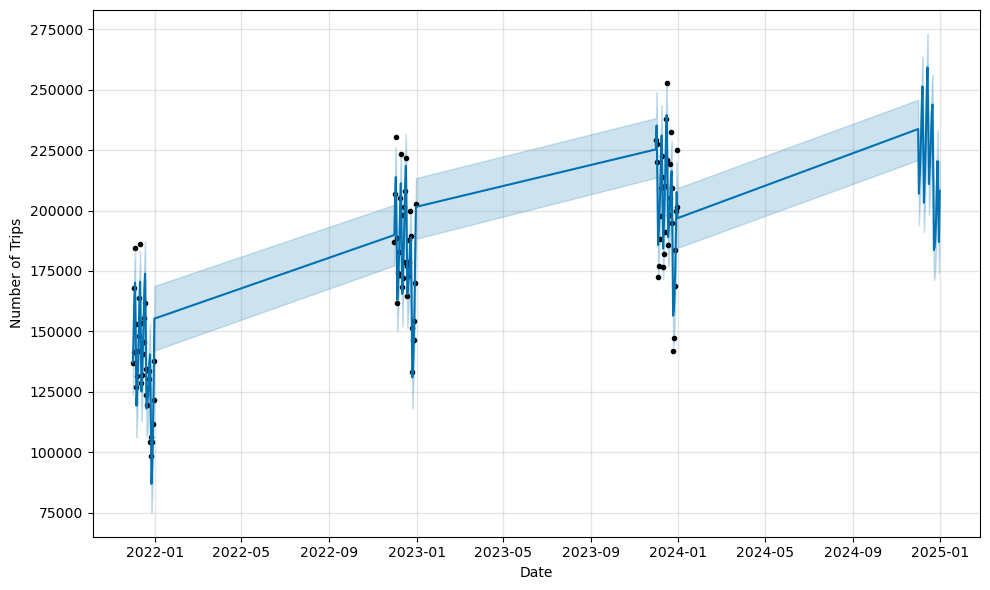

In [22]:
m_count.plot(forecast_count, xlabel="Date", ylabel="Number of Trips");

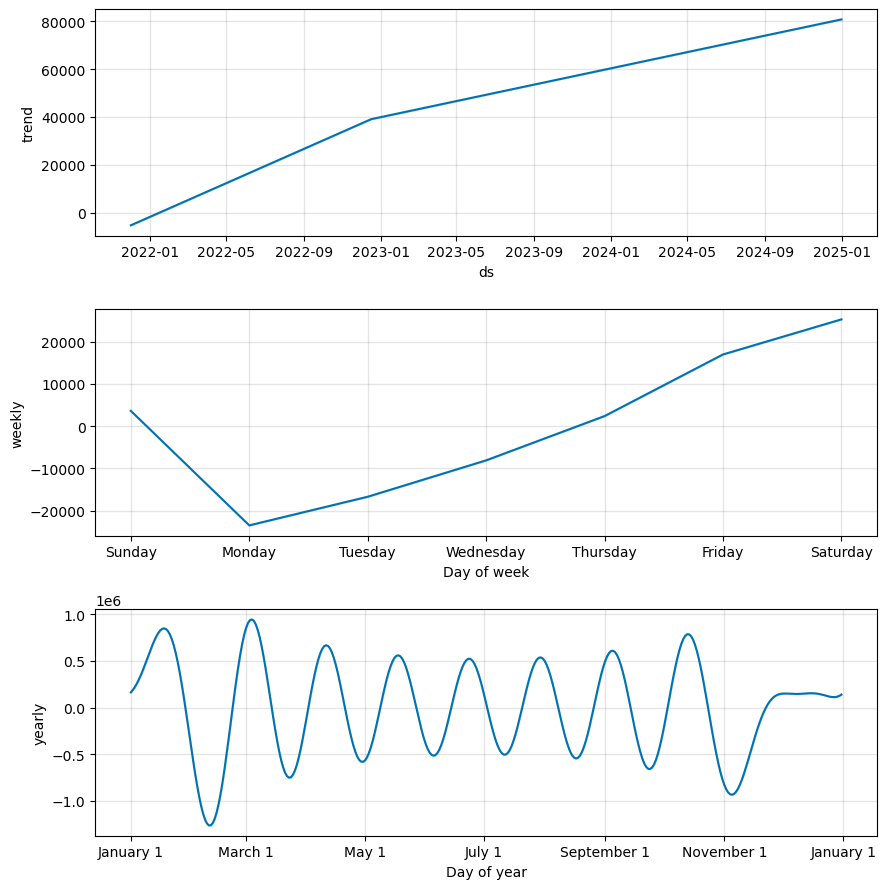

In [23]:
# Plot the individual time series components of the model
fig3 = m_count.plot_components(forecast_count);

In [24]:
forecast_count = forecast_count.set_index('ds')
forecast_count.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-12-27,80527.588962,197168.500656,222948.126500,80478.946622,80562.663521,129670.840422,129670.840422,129670.840422,16985.103325,16985.103325,16985.103325,112685.737097,112685.737097,112685.737097,0.0,0.0,0.0,210198.429384
2024-12-28,80583.538304,209591.947470,233125.690738,80532.064448,80622.129719,139950.659493,139950.659493,139950.659493,25296.758838,25296.758838,25296.758838,114653.900655,114653.900655,114653.900655,0.0,0.0,0.0,220534.197797
2024-12-29,80639.487645,192268.043164,216493.501563,80585.970141,80680.079573,123786.928377,123786.928377,123786.928377,3628.954113,3628.954113,3628.954113,120157.974264,120157.974264,120157.974264,0.0,0.0,0.0,204426.416022
2024-12-30,80695.436987,174251.121964,200781.355591,80637.362701,80737.262960,106322.123434,106322.123434,106322.123434,-23493.823039,-23493.823039,-23493.823039,129815.946473,129815.946473,129815.946473,0.0,0.0,0.0,187017.560421
2024-12-31,80751.386329,194672.405308,220620.928302,80690.080305,80795.168976,127456.425408,127456.425408,127456.425408,-16712.226002,-16712.226002,-16712.226002,144168.651410,144168.651410,144168.651410,0.0,0.0,0.0,208207.811736


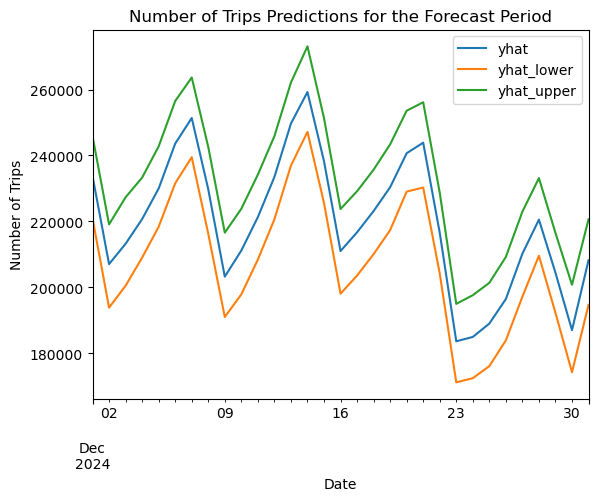

In [25]:
# Plot predictions for our forecast period
forecast_count[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-31:,:].plot(title="Number of Trips Predictions for the Forecast Period", xlabel="Date", ylabel="Number of Trips");
